In [8]:
import random 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dataset

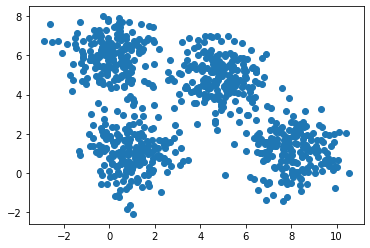

In [43]:
#data=pd.read_csv('example1.csv')
#data=pd.read_csv('xclara.csv')

#data=data.values.tolist()
#data=np.array(data)



# Set three centers, the model should predict similar results
center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])
center_4 = np.array([0,6])
# Generate random data and center it to the three centers
data_1 = np.random.randn(200, 2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3
data_4 = np.random.randn(200,2) + center_4
data = np.concatenate((data_1, data_2, data_3,data_4), axis = 0)


plt.scatter(data[:,0],data[:,1])
plt.show()

In [7]:
type(data)

numpy.ndarray

In [81]:

#---ref  https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

# Function: Should Stop
# -------------
# Returns True or False if k-means is done. K-means terminates either
# because it has run a maximum number of iterations OR the centroids
# stop changing.
def shouldStop(oldCentroids, centroids, iterations,MAX_ITERATIONS):
    if iterations > MAX_ITERATIONS: return True
    #print(oldCentroids)
    return np.array_equal(oldCentroids,centroids)

# Function: Get Labels
# -------------
# Returns a label for each piece of data in the dataset. 
def getLabels(dataSet, centroids):
    # For each element in the dataset, chose the closest centroid. 
    # Make that centroid the element's label.
    labels=[-1]*len(dataSet)
    for i,val  in enumerate(dataSet):
            new_cluster=np.argmin([ eucliad_dist(centre,val) for centre in centroids])
            labels[i]=new_cluster
    return labels
    
# Function: Get Centroids
# -------------
# Returns k random centroids, each of dimension n.
def getCentroids(dataSet, labels, k):
    # Each centroid is the geometric mean of the points that
    # have that centroid's label. Important: If a centroid is empty (no points have
    # that centroid's label) you should randomly re-initialize it.
    new_data_group=[ [] for i in range(k)]
    #cluster assignmnet
    for i,val  in enumerate(dataSet):
        cluster=labels[i]
        new_data_group[cluster].append(val)
    centroid=[]
    for label in range(k):
        data_temp=np.array(new_data_group[label])
        data_temp=np.array(data_temp)
        centroid.append(list(np.mean(data_temp,axis=0)))        
    return centroid 

# Function: Get distance
# -------------
# Returns d of between two array of ,m dimensional point
def eucliad_dist(point1,point2):
    return np.sqrt(((point1-point2)**2).sum(axis=0))


    
# Function: uses kmean++ initialization,improve clustering https://en.wikipedia.org/wiki/K-means%2B%2B
# -------------
# Returns k random centroids, each of dimension n.
def kmeanPP_initialization(data,k):
    centroid_list=[]
    #chose a random point
    
    c=random.sample(list(data),1)
    c=c[0].tolist()
    centroid_list.append( c ) 
    if k==1:
         
        return centroid_list
    else:
        new_data=list(data)
        new_data=[item for item in new_data if (item !=c).all()]
        for i in range(k-1):
            avg_dist=[-1]*len(new_data)
            for j,data in enumerate(new_data):
                avg_dist[j]=sum([ eucliad_dist(item,data) for item in centroid_list ])/len(centroid_list)
            max_dist=max(avg_dist)
            index=[ i for i,val in enumerate(avg_dist) if avg_dist[i]==max_dist]
            #print(type(index))
            new_centroid=new_data[index[0]].tolist()            
            centroid_list.append(new_centroid)
            new_data=[item for item in new_data if (item!= new_centroid).all()] 
    return centroid_list
    
def plotKmean(data,c,cluster_index,k):
    colors = ['r', 'g', 'b', 'y', 'c', 'm','g0']
    fig, ax = plt.subplots()
    for i in range(k):
            points = np.array([data[j] for j in range(len(data)) if cluster_index[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=10, c=colors[i] )
    ax.scatter(c[:, 0], c[:, 1], marker='*', s=200, c='#050505')

In [83]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
def kmeans(dataSet, k):
    
    #numFeatures = dataSet.getNumFeatures()
    numFeatures = dataSet.shape[1]
    
    # Initialize of centroids 
    
    #initialization1: randomly grid
    #centroids=np.random.randn(k,numFeatures)*np.std(data)+np.mean(data)
    
    #initalization2: randomly point
    #centroids=random.sample(data.tolist(),k)    
    #centroids=np.array(centroids)
       
    #initalization3:kmean++ initialization
    centroids=kmeanPP_initialization(data,k)
    
    # Initialize book keeping vars.
    iterations = 0
    MAX_ITERATIONS=100
    oldCentroids = np.random.randn(k,numFeatures)
    
    # Run the main k-means algorithm
    while not shouldStop(oldCentroids, centroids, iterations,MAX_ITERATIONS):
        # Save old centroids for convergence test. Book keeping.
        oldCentroids = centroids
        iterations += 1
        
        # Assign labels to each datapoint based on centroids
        labels = getLabels(dataSet, centroids)
        
        # Assign centroids based on datapoint labels
        centroids = getCentroids(dataSet, labels, k)
        
    # We can get the labels too by calling getLabels(dataSet, centroids)
    return centroids,labels

In [86]:
z,l=kmeans(data,4)

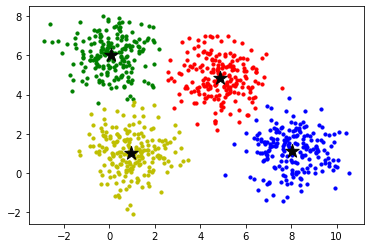

In [87]:
plotKmean(data,np.array(z),l,4)

In [88]:
z

[[4.858891305189575, 4.866970565133365],
 [0.08555726200068997, 6.032870828774364],
 [8.032503087626104, 1.137483963725634],
 [0.9524920446132201, 1.0351306113599423]]

In [90]:
from sklearn.cluster import KMeans
import numpy as np
X = data
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
kmeans.labels_
kmeans.predict(data)
c2=kmeans.cluster_centers_
c2

array([[0.08555726, 6.03287083],
       [8.03250309, 1.13748396],
       [0.95249204, 1.03513061],
       [4.85889131, 4.86697057]])